In [2]:
import pandas as pd
import joblib
import numpy as np

# -------------------------------
# 1. Load the New Test Dataset
# -------------------------------
# Update the path to your new test dataset
test_df = pd.read_csv("E:/4.2/IOT LAb/data/sensor_data.csv")

print("Test DataFrame shape:", test_df.shape)

# -------------------------------
# 2. Load the Previously Trained Model
# -------------------------------
rf_model = joblib.load("E:/4.2/IOT LAb/train code/rf_model.pkl")
print("Loaded trained model.")

# -------------------------------
# 3. Define the Feature Columns Used During Training
# -------------------------------
features = ['PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']

# -------------------------------
# 4. Ensure All Required Features Are Present in the Test Data
# -------------------------------
for col in features:
    if col not in test_df.columns:
        print(f"Warning: Column {col} is missing in test data. Filling with 0.")
        test_df[col] = 0  # Assigning default value 0 to missing columns

# -------------------------------
# 5. Handle Missing Values in Test Data
# -------------------------------
for col in features:
    test_df[col].fillna(test_df[col].mean(), inplace=True)

# -------------------------------
# 6. Extract Features and Maintain Correct Order
# -------------------------------
X_test_new = test_df[features]  # Ensure correct column order

# -------------------------------
# 7. Predict AQI on the Test Data
# -------------------------------
test_df['predicted_aqi'] = rf_model.predict(X_test_new)

# -------------------------------
# 8. Define a Function to Assign AQI Buckets
# -------------------------------
def assign_aqi_bucket(aqi_value):
    if aqi_value <= 50:
        return 'Good'
    elif aqi_value <= 100:
        return 'Moderate'
    elif aqi_value <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi_value <= 200:
        return 'Unhealthy'
    elif aqi_value <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

# -------------------------------
# 9. Apply the Bucket Assignment Function
# -------------------------------
test_df['predicted_aqi_bucket'] = test_df['predicted_aqi'].apply(assign_aqi_bucket)

# -------------------------------
# 10. Display the Results
# -------------------------------
print(test_df[['predicted_aqi', 'predicted_aqi_bucket']])

new_test = test_df.loc[:, (test_df != 0).any(axis=0)]
new_test
# -------------------------------
# 11. Save the Predictions to a CSV File
# -------------------------------
new_test.to_csv("predicted_test_results.csv", index=False)
print("Test predictions saved to 'predicted_test_results.csv'.")


Test DataFrame shape: (7167, 8)
Loaded trained model.
      predicted_aqi            predicted_aqi_bucket
0            224.08                  Very Unhealthy
1            224.08                  Very Unhealthy
2            224.08                  Very Unhealthy
3            224.08                  Very Unhealthy
4            224.08                  Very Unhealthy
...             ...                             ...
7162         142.12  Unhealthy for Sensitive Groups
7163         142.12  Unhealthy for Sensitive Groups
7164         142.12  Unhealthy for Sensitive Groups
7165         142.12  Unhealthy for Sensitive Groups
7166         142.12  Unhealthy for Sensitive Groups

[7167 rows x 2 columns]
Test predictions saved to 'predicted_test_results.csv'.


In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------
# 1. Load the Training Dataset
# -------------------------------
# Update the path to your training dataset
train_df = pd.read_csv("E:/4.2/IOT LAb/train code/new_train.csv")
print("Training DataFrame shape:", train_df.shape)

# -------------------------------
# 2. Ensure All Required Features Are Present in the Training Data
# -------------------------------
# (Using the same features list as before)
train_df


Training DataFrame shape: (29531, 18)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,pred_aqi,pred_aqi_bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,219.430000,Very Unhealthy
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,123.811389,Unhealthy for Sensitive Groups
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,337.050000,Hazardous
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,131.977076,Unhealthy for Sensitive Groups
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,417.030000,Hazardous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,47.990000,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,72.400000,Moderate
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,71.740000,Moderate
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,57.240000,Moderate


In [5]:
# Load the test predictions that contain the "predicted_aqi" column
test_df = pd.read_csv("E:/4.2/IOT LAb/train code/predicted_test_results.csv")

test_df

,Timestamp,Temperature (C),Humidity (%),MQ2,Air Quality,PM1.0,PM2.5,PM10,predicted_aqi,predicted_aqi_bucket
0,2/5/2025 15:15,27.2,62,733,720,60,103,123,224.08,Very Unhealthy
1,2/5/2025 15:15,27.2,62,723,724,60,103,123,224.08,Very Unhealthy
2,2/5/2025 15:15,27.2,62,723,762,60,103,123,224.08,Very Unhealthy
3,2/5/2025 15:15,27.2,62,711,743,60,103,123,224.08,Very Unhealthy
4,2/5/2025 15:15,27.2,62,739,736,60,103,123,224.08,Very Unhealthy
...,...,...,...,...,...,...,...,...,...,...
7162,2/5/2025 15:52,26.4,66,980,1354,45,78,92,142.12,Unhealthy for Sensitive Groups
7163,2/5/2025 15:52,26.4,66,791,1331,45,78,92,142.12,Unhealthy for Sensitive Groups
7164,2/5/2025 15:52,26.4,66,913,1346,45,78,92,142.12,Unhealthy for Sensitive Groups
7165,2/5/2025 15:52,26.4,66,871,1349,45,78,92,142.12,Unhealthy for Sensitive Groups


DataFrame shape: (7167, 10)
Sequence shape: (7156, 10, 7) (7156, 1)
Train shape: (5009, 10, 7) (5009, 1)
Test shape: (2147, 10, 7) (2147, 1)


e:\Anaconda\anaAPP\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0673 - val_loss: 0.0135
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0096 - val_loss: 0.0092
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0083 - val_loss: 0.0064
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0078 - val_loss: 0.0098
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0067 - val_loss: 0.0182
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0065 - val_loss: 0.0498
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0057 - val_loss: 0.0692
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0053 - val_loss: 0.1325
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0046 - val_loss: 0.1711
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0042 - val_loss: 0.2161
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0046 - val_loss: 0.2193
Epoch 12/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

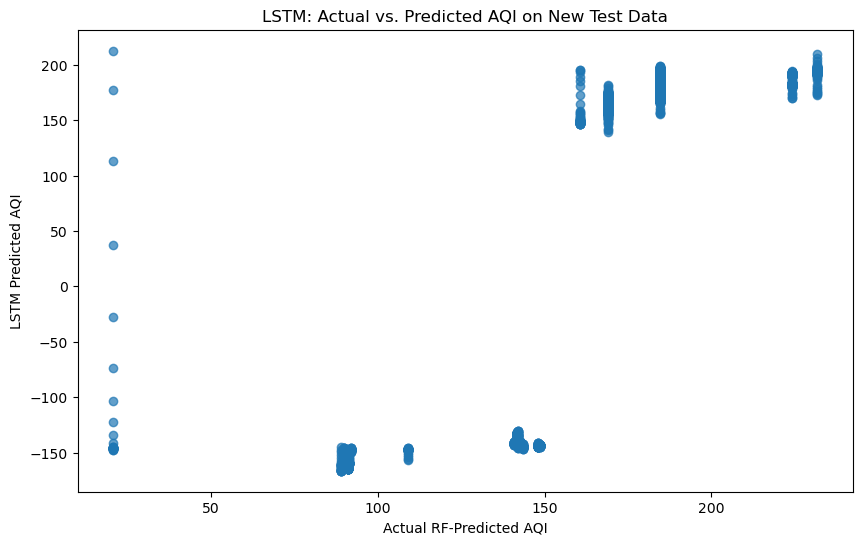

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Load the Predicted Test Dataset
df = pd.read_csv("predicted_test_results.csv")
print("DataFrame shape:", df.shape)

# 2. Define the Sensor Feature Columns (numeric only) and Target Column
features = [
    'Temperature (C)', 
    'Humidity (%)', 
    'MQ2', 
    'Air Quality', 
    'PM1.0', 
    'PM2.5', 
    'PM10'
]
target_col = 'predicted_aqi'  # The RF-predicted AQI is now our target

# Make sure all required columns are present
for col in features + [target_col]:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in the dataset.")

# 3. Scale the Sensor Features and the Target (predicted_aqi) Separately
feature_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = feature_scaler.fit_transform(df[features])

aqi_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = aqi_scaler.fit_transform(df[[target_col]])

# 4. Create Sequences for the LSTM Model
def create_sequences(features_array, target_array, time_step=10):
    X, y = [], []
    for i in range(len(features_array) - time_step - 1):
        X.append(features_array[i:(i + time_step)])
        y.append(target_array[i + time_step])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_sequences(scaled_features, scaled_target, time_step)
print("Sequence shape:", X.shape, y.shape)

# 5. Split Data (70% train, 30% test)
train_size = int(len(X) * 0.7)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# 6. Build the LSTM Model
model_lstm = Sequential()
model_lstm.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(LSTM(50))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# 7. Train the LSTM Model
history = model_lstm.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# 8. Make Predictions
train_predict = model_lstm.predict(X_train)
test_predict = model_lstm.predict(X_test)

# 9. Inverse Transform Predictions and Targets
train_predict_inv = aqi_scaler.inverse_transform(train_predict)
test_predict_inv = aqi_scaler.inverse_transform(test_predict)
y_test_inv = aqi_scaler.inverse_transform(y_test)

# 10. Evaluate
mse_lstm = mean_squared_error(y_test_inv, test_predict_inv)
r2_lstm = r2_score(y_test_inv, test_predict_inv)

print(f'LSTM Model - Mean Squared Error: {mse_lstm}')
print(f'LSTM Model - R-squared: {r2_lstm}')

# 11. Plot Actual vs. Predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test_inv, test_predict_inv, alpha=0.7)
plt.xlabel('Actual RF-Predicted AQI')
plt.ylabel('LSTM Predicted AQI')
plt.title('LSTM: Actual vs. Predicted AQI on New Test Data')
plt.show()
